In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Read the output file #
df = pd.read_csv("outputs/hercules_output.csv", index_col=False)
df.head()

,dt,hercules_comms.amr_wind.wind_farm_0.num_turbines,hercules_comms.amr_wind.wind_farm_0.rotor_diameter,hercules_comms.amr_wind.wind_farm_0.turbine_powers.000,hercules_comms.amr_wind.wind_farm_0.turbine_powers.001,hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000,hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001,hercules_comms.amr_wind.wind_farm_0.wind_direction,hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind,hercules_comms.amr_wind.wind_farm_0.wind_farm_power,...,py_sims.solar_farm_0.initial_conditions.dni,py_sims.solar_farm_0.outputs.power_kw,py_sims.solar_farm_0.outputs.dni,py_sims.solar_farm_0.outputs.aoi,py_sims.inputs.available_power,py_sims.inputs.sim_time_s,external_signals.time,external_signals.solar_power_reference_kw,time,clock_time
0,0.5,2,126.0,1113.523618,1110.765699,240.0,240.0,240.0,0.5,2224.289317,...,1000,21999.5,331.196045,41.479017,24223.789317,0.5,0.5,21999.5,0.5,2024-11-22 19:11:48.679381
1,0.5,2,126.0,1670.285427,1666.148549,240.0,240.0,240.0,1.0,3336.433976,...,1000,21999.0,331.531891,41.479017,25335.433976,1.0,1.0,21999.0,1.0,2024-11-22 19:11:48.776796
2,0.5,2,126.0,1948.666332,1943.839974,240.0,240.0,240.0,1.5,3892.506305,...,1000,21998.5,331.867737,41.479017,25891.006305,1.5,1.5,21998.5,1.5,2024-11-22 19:11:48.873344
3,0.5,2,126.0,2087.856784,2082.685686,240.0,240.0,240.0,2.0,4170.542470,...,1000,21998.0,332.203583,41.479017,26168.542470,2.0,2.0,21998.0,2.0,2024-11-22 19:11:48.971661
4,0.5,2,126.0,2157.452010,2152.108542,240.0,240.0,240.0,2.5,4309.560552,...,1000,21997.5,332.539429,41.479017,26307.060552,2.5,2.5,21997.5,2.5,2024-11-22 19:11:49.068270


In [11]:
df.columns

Index(['dt', 'hercules_comms.amr_wind.wind_farm_0.num_turbines',
       'hercules_comms.amr_wind.wind_farm_0.rotor_diameter',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.001',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001',
       'hercules_comms.amr_wind.wind_farm_0.wind_direction',
       'hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind',
       'hercules_comms.amr_wind.wind_farm_0.wind_farm_power',
       'hercules_comms.amr_wind.wind_farm_0.wind_speed',
       'hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.001',
       'hercules_comms.helics.config.use_dash_frontend',
       'hercules_comms.helics.config.KAFKA',
       'hercules_comms.helics.config.helics.helicsport',
       'hercules_comms.helics.config.helics.deltat',


Text(0.5, 0, 'time [hr]')

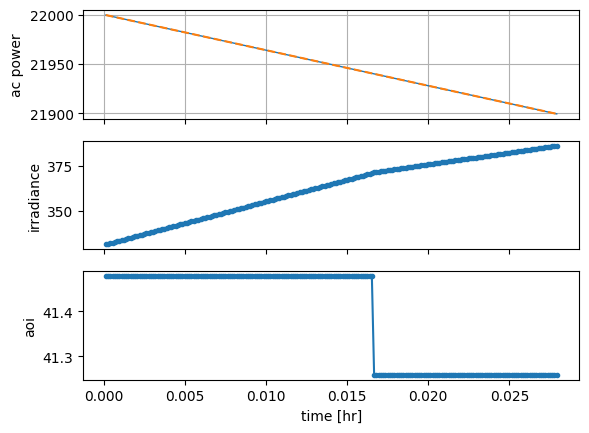

In [12]:
# first test solar module outputs
time = df["hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind"]

if "external_signals.solar_power_reference_kw" in df.columns:
    power_setpoint = df["external_signals.solar_power_reference_kw"]
ac_power = df["py_sims.solar_farm_0.outputs.power_kw"]
# dc_power = df["py_sims.solar_farm_0.outputs.dc_power_kw"]
aoi = df["py_sims.solar_farm_0.outputs.aoi"]
irradiance = df["py_sims.solar_farm_0.outputs.dni"]

fig, ax = plt.subplots(3, 1, sharex="col")  # , figsize=[6,5], dpi=250)

if "external_signals.solar_power_reference_kw" in df.columns:
    ax[0].plot(time / 3600, power_setpoint, "-", linewidth=1, label='setpoint', color="C0")
ax[0].plot(time / 3600, ac_power, "--", label="power", color="C1")
ax[0].set_ylabel("ac power")
ax[0].grid()
# ax[0].legend()

# ax[1].plot(time / 3600, dc_power, ".-", label="dc power")
# ax[1].set_ylabel("dc power")

ax[1].plot(time / 3600, irradiance, ".-", label="irradiance")
ax[1].set_ylabel("irradiance")
# ax[1].legend()

ax[2].plot(time / 3600, aoi, ".-", label="aoi")
ax[2].set_ylabel("aoi")
ax[-1].set_xlabel("time [hr]")

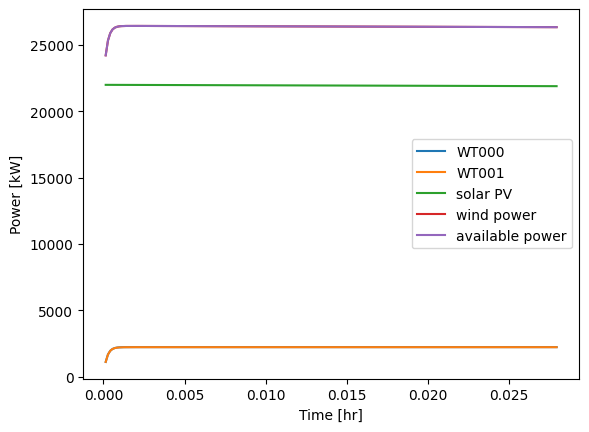

In [13]:
plt.figure()
plt.plot(time / 3600, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.000"], label="WT000")
plt.plot(time / 3600, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.001"], label="WT001")
plt.plot(time / 3600, df["py_sims.solar_farm_0.outputs.power_kw"], label="solar PV")
plt.plot(time / 3600, df["py_sims.inputs.available_power"], label="wind power")
plt.plot(time / 3600, df["py_sims.inputs.available_power"], label="available power")
plt.ylabel("Power [kW]")
plt.xlabel("Time [hr]")
plt.legend()